# Preparation

In [6]:
## Import basic libraries to handle data 
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# ## Data import from local drive
# df = pd.read_csv(join('data','iris.csv'), sep=';'))
# df.head(5)

In [8]:
## Data import from web
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
## Explore data
np_data = np.array(data)
print(np_data[0:5,:])

[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']]


In [10]:
datax = np_data[:,0:4]
datay = np_data[:,-1]
print(datax[0:5,:])
print(datay[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa']


In [11]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3)
print(trnx.shape, tstx.shape, trny.shape, tsty.shape)

(105, 4) (45, 4) (105,) (45,)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trnx)
trnx_scale = scaler.transform(trnx)
tstx_scale = scaler.transform(tstx)
print(np.min(trnx_scale[:,0]), np.max(trnx_scale[:,0]))
print(np.min(tstx_scale[:,0]), np.max(tstx_scale[:,0]))

0.0 1.0
0.08333333333333326 0.9444444444444442


## NN with Scikit-Learn

In [13]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500)
clf.fit(trnx, trny)
tsty_hat = clf.predict(tstx)

C:\Users\dongilkim\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [14]:
print(clf)
#print(clf.loss_curve_)
print(tsty[0:10])
print(tsty_hat[0:10])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
['versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'virginica']
['versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'virginica']


In [15]:
clf2 = MLPClassifier(hidden_layer_sizes=(10,15,10,), max_iter=500)
clf2.fit(trnx, trny)
tsty_hat2 = clf2.predict(tstx)
print(tsty[0:10])
print(tsty_hat2[0:10])

['versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'virginica']
['versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'virginica']


C:\Users\dongilkim\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(tsty, tsty_hat), accuracy_score(tsty, tsty_hat2))

0.9333333333333333 0.9777777777777777


# SVM with scikit-learn

In [17]:
from sklearn.svm import SVC
svc_model = SVC(C=100, kernel='rbf', degree=3, gamma=0.1, 
                coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, 
                class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
svc_model.fit(X=trnx, y=trny)
tsty_hat = svc_model.predict(tstx)

In [18]:
accuracy_score(tsty, tsty_hat)

0.9111111111111111

In [19]:
print(tsty)
print(tsty_hat)

['versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'setosa' 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica'
 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'setosa']
['versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa' 'versic

# NN with Tensorflow

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [22]:
trnx_f32 = trnx.astype(np.float32)
tstx_f32 = tstx.astype(np.float32)

In [23]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
trny_onehot = encoder.fit_transform(trny)
tsty_onehot = encoder.transform(tsty)

print(trny_onehot[0:5,:])
print(tsty_onehot[0:5,:])

[[0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]
[[0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]]


## TF with Sequential API

In [24]:
input_shape = (4,)

mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units = 10, activation = 'relu', input_shape=input_shape))
mlp_model.add(layers.Dense(units = 20, activation = 'relu'))
mlp_model.add(layers.Dense(units = 10, activation = 'relu'))
mlp_model.add(layers.Dense(units = 3, activation = 'softmax'))

mlp_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [25]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = mlp_model.fit(trnx_f32, trny_onehot, validation_data = [tstx_f32, tsty_onehot], batch_size=10, epochs=50)

Train on 105 samples, validate on 45 samples
Epoch 1/50
105/105 [==============================] - 1s 8ms/sample - loss: 1.1999 - accuracy: 0.3238 - val_loss: 1.0514 - val_accuracy: 0.3556
Epoch 2/50
105/105 [==============================] - 0s 370us/sample - loss: 1.0415 - accuracy: 0.4095 - val_loss: 0.9540 - val_accuracy: 0.7111
Epoch 3/50
105/105 [==============================] - 0s 370us/sample - loss: 0.9563 - accuracy: 0.6571 - val_loss: 0.8940 - val_accuracy: 0.7111
Epoch 4/50
105/105 [==============================] - 0s 361us/sample - loss: 0.9050 - accuracy: 0.6476 - val_loss: 0.8516 - val_accuracy: 0.7111
Epoch 5/50
105/105 [==============================] - 0s 456us/sample - loss: 0.8606 - accuracy: 0.6476 - val_loss: 0.8074 - val_accuracy: 0.7111
Epoch 6/50
105/105 [==============================] - 0s 494us/sample - loss: 0.8167 - accuracy: 0.6476 - val_loss: 0.7628 - val_accuracy: 0.7111
Epoch 7/50
105/105 [==============================] - 0s 522us/sample - loss: 0.7

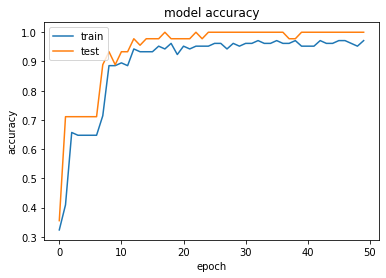

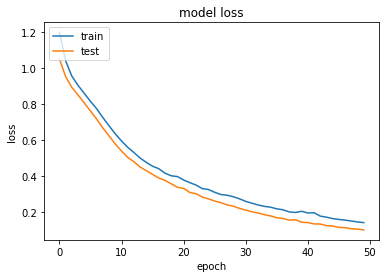

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## TF with Functional API

In [29]:
input_shape = (4,)

visible = layers.Input(shape=input_shape)
hidden1 = layers.Dense(10, activation='relu')(visible)
hidden2 = layers.Dense(20, activation='relu')(hidden1)
hidden3 = layers.Dense(10, activation='relu')(hidden2)
output = layers.Dense(3, activation='softmax')(hidden3)

mlp_function = models.Model(visible, output)

mlp_function.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_5 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 33        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [30]:
mlp_function.compile(optimizer='RMSprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = mlp_function.fit(trnx_f32, trny_onehot, validation_data = [tstx_f32, tsty_onehot], batch_size=10, epochs=50)

Train on 105 samples, validate on 45 samples
Epoch 1/50
105/105 [==============================] - 1s 6ms/sample - loss: 1.1937 - accuracy: 0.2381 - val_loss: 1.1374 - val_accuracy: 0.1111
Epoch 2/50
105/105 [==============================] - 0s 370us/sample - loss: 1.1250 - accuracy: 0.2286 - val_loss: 1.0811 - val_accuracy: 0.3778
Epoch 3/50
105/105 [==============================] - 0s 389us/sample - loss: 1.0904 - accuracy: 0.4571 - val_loss: 1.0431 - val_accuracy: 0.4444
Epoch 4/50
105/105 [==============================] - 0s 370us/sample - loss: 1.0588 - accuracy: 0.3810 - val_loss: 1.0017 - val_accuracy: 0.3556
Epoch 5/50
105/105 [==============================] - 0s 370us/sample - loss: 1.0165 - accuracy: 0.3333 - val_loss: 0.9706 - val_accuracy: 0.3556
Epoch 6/50
105/105 [==============================] - 0s 408us/sample - loss: 0.9937 - accuracy: 0.3429 - val_loss: 0.9464 - val_accuracy: 0.3556
Epoch 7/50
105/105 [==============================] - 0s 418us/sample - loss: 0.9

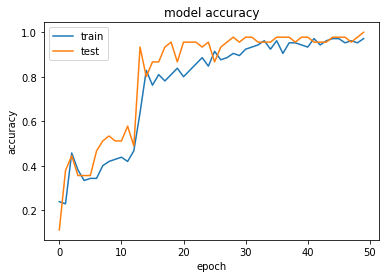

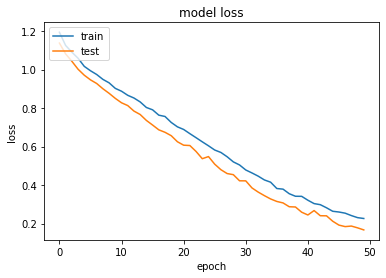

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## TF low level API

In [32]:
print(tf.__version__)

2.1.0


In [33]:
initializer = tf.initializers.glorot_uniform()
def get_weight( shape , name ):
    return tf.Variable( initializer( shape ) , name=name , trainable=True , dtype=tf.float32 )

shapes = [
    [4, 15] , 
    [15, 30] , 
    [30, 15] , 
    [15, 3] ,
]

weights = []
for i in range( len( shapes ) ):
    weights.append( get_weight( shapes[ i ] , 'weight{}'.format( i ) ) )

In [34]:
def model(X, p_keep_hidden):

    h1 = tf.nn.sigmoid(tf.matmul(X, weights[0]))
    #h1 = tf.nn.dropout(h1, p_keep_hidden)
    
    h2 = tf.nn.relu(tf.matmul(h1, weights[1]))
    h2 = tf.nn.dropout(h2, p_keep_hidden)
    
    h3 = tf.matmul(h2, weights[2])
    h3 = tf.nn.sigmoid(h3)
    #h3 = tf.nn.dropout(h3, p_keep_hidden)
    
    out = tf.nn.softmax(tf.matmul(h3, weights[3]))
    
    return out

In [35]:
p_keep_hidden = 0.1
learning_rate = 0.01
optimizer = tf.optimizers.Adam(learning_rate)
def loss(target, pred):
    return tf.losses.categorical_crossentropy(target,pred)

def train_step(model, inputs, outputs):
    with tf.GradientTape() as tape:
        current_loss = loss(outputs,model(inputs, p_keep_hidden))
    grads = tape.gradient( current_loss , weights )
    optimizer.apply_gradients( zip( grads , weights ) )
    #print( tf.reduce_mean( current_loss ) )

In [36]:
batch_size = 50
max_epoch = 100
for i in range(max_epoch):
    start = np.random.permutation(len(trnx)-10)[0]
    end = start+10
    train_step(model, trnx_f32[start:end,:], trny_onehot[start:end,:].astype('float32'))

In [38]:
from sklearn.metrics import accuracy_score

pred = model(tstx_f32, p_keep_hidden)
print(tf.argmax(tsty_onehot.astype('float32'), axis=1))
print(tf.argmax(pred, axis=1))

accuracy_score(tf.argmax(tsty_onehot, axis=1), tf.argmax(pred, axis=1))

tf.Tensor(
[1 1 2 0 2 0 0 2 1 2 2 0 2 2 0 0 1 1 0 0 1 2 0 0 1 2 0 2 1 1 2 0 1 2 2 0 2
 0 2 1 2 0 1 1 0], shape=(45,), dtype=int64)
tf.Tensor(
[1 1 2 0 2 0 0 2 1 2 2 0 2 2 0 0 2 1 0 0 1 2 0 0 1 2 0 2 1 1 2 0 1 1 1 0 2
 0 2 1 2 0 1 1 0], shape=(45,), dtype=int64)


0.9333333333333333

In [39]:
print("텐서가 GPU #0에 있는가 : "),
print(pred.device.endswith('GPU:0'))

텐서가 GPU #0에 있는가 : 
True
